## Step 1 — Load Cleaned Dataset and Split into Train/Test

In this step, we load the preprocessed dataset (`cleaned_combined.csv`) and prepare it for model training.  
We split the data into training and testing sets to evaluate generalization performance.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load cleaned dataset
DATA_PATH = "../data/processed/cleaned_combined.csv"
df = pd.read_csv(DATA_PATH)

# Basic info
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())

# Check label balance
print("\nLabel distribution:")
print(df["label"].value_counts(normalize=True).round(3))

# Define features and target
X = df["content"]
y = df["label"]

# Split into train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTrain size:", len(X_train))
print("Test size:", len(X_test))

Dataset shape: (38502, 6)
Columns: ['title', 'text', 'subject', 'date', 'label', 'content']

Label distribution:
label
1    0.55
0    0.45
Name: proportion, dtype: float64

Train size: 30801
Test size: 7701


## Step 2 — TF-IDF Vectorization

Here we convert the text data into numerical form using the TF-IDF (Term Frequency–Inverse Document Frequency) method.  
This helps the model understand which words are important in distinguishing between *real* and *fake* news.  
Common words like “the” or “said” get lower weights, while unique, meaningful words get higher weights.


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(
    max_features=5000,    # limit number of words to keep it efficient
    ngram_range=(1, 2),   # include unigrams and bigrams
    stop_words='english'  # remove common stopwords
)

# Fit on training data, transform both train and test
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF train shape:", X_train_tfidf.shape)
print("TF-IDF test shape:", X_test_tfidf.shape)

TF-IDF train shape: (30801, 5000)
TF-IDF test shape: (7701, 5000)


## Step 3 — Train Logistic Regression Model

Now, we train a simple Logistic Regression model as a baseline for comparison.  
This model will learn which words (features) increase or decrease the probability of a news article being *real* or *fake*.

In [3]:
from sklearn.linear_model import LogisticRegression

# Initialize model
log_reg = LogisticRegression(max_iter=200, n_jobs=-1, random_state=42)

# Train on TF-IDF features
log_reg.fit(X_train_tfidf, y_train)

print("✅ Logistic Regression training complete.")

✅ Logistic Regression training complete.


## Step 4 — Evaluate Model Performance

We now evaluate the Logistic Regression baseline model using the test dataset.  
Metrics include **Accuracy**, **Precision**, **Recall**, and **F1-score** 

These help us understand both the overall success rate and how well the model balances between detecting *fake* and *real* news.

📊 Logistic Regression Baseline Performance
Accuracy : 0.9856
Precision: 0.9818
Recall   : 0.9922
F1 Score : 0.9870

Detailed classification report:

              precision    recall  f1-score   support

        Fake       0.99      0.98      0.98      3462
        Real       0.98      0.99      0.99      4239

    accuracy                           0.99      7701
   macro avg       0.99      0.98      0.99      7701
weighted avg       0.99      0.99      0.99      7701



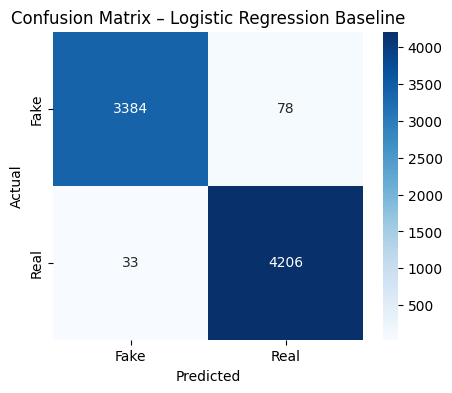

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test set
y_pred = log_reg.predict(X_test_tfidf)

# Calculate key metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print("📊 Logistic Regression Baseline Performance")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}\n")

# Detailed report
print("Detailed classification report:\n")
print(classification_report(y_test, y_pred, target_names=["Fake", "Real"]))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake","Real"], yticklabels=["Fake","Real"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Logistic Regression Baseline")
plt.show()

## Step 5 — Baseline Summary

The Logistic Regression model using TF-IDF features performed very well:

- **Accuracy:** 98.5%  
- **Precision:** 98.1%  
- **Recall:** 99.2%  
- **F1-score:** 98.7%  

The confusion matrix shows balanced performance for both *fake* and *real* classes.  
Very few misclassifications, indicating strong generalization.  
This Logistic Regression model serves as a **baseline** for comparison with the next stage which is **DistilBERT fine-tuning**.

Next, we’ll test whether a transformer-based model (DistilBERT) can achieve even better semantic understanding and robustness compared to TF-IDF.
